<b>RFE (recursive feature elimination)</b> <br>
select features by recursively considering smaller and smaller sets of features based ranking in feature weight/importance analysis

1. Train estimator with initial set of features and the importance of each feature.
2. The least important feature(s) is removed from consideration
3. Repeat (1) and (2) until desired # features is obtained.

<b> SelectFromMode</b> <br>
Like RFE without iteration. Ranking for feature selection is based on mean or median of feature importance estimated by ML model

# Import Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectFromModel

from sklearn.datasets import load_breast_cancer

# Load Data & Pre-Process

In [2]:
data_obj = load_breast_cancer()

In [3]:
# Add 50 fake fetures with random values

rvg  = np.random.RandomState(42)                        # random value generator
rv   = rvg.normal( size=(len(data_obj.data),50) )       # 50 new fake features with same amound of rows as raw data
X = np.hstack([data_obj.data, rv])
y = data_obj.target

In [4]:
print(f'Ori input size : {data_obj.data.shape}')
print(f'New input size : {X.shape}')

Ori input size : (569, 30)
New input size : (569, 80)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Train Model

In [6]:
classifier = RandomForestClassifier(n_estimators=100, random_state=0)

## RFE

In [7]:
model_rfe = RFE(classifier, n_features_to_select=30)
model_rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=0, verbose=0,
                                     warm_start=False),
    n_features_to_select=30, step=1, verbose=0)

In [8]:
print(f'Before feature selection : {X_train.shape}')
print(f'After  feature selection : {model_rfe.transform(X_train).shape}')

Before feature selection : (284, 80)
After  feature selection : (284, 30)


## SelectFromModel

In [17]:
model_sfm = SelectFromModel(classifier, max_features=30, threshold='median')
model_sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

# Evaluation : Feature Importance

In [10]:
n_feature_ori = data_obj.data.shape[1]
n_feature_ori

30

## RFE

In [11]:
mask_rfe = model_rfe.get_support()                          # mask of the features selected

n_selected_from_ori_rfe = sum(1 for i in mask_rfe[:n_feature_ori] if i == True)
acc_rfe = n_selected_from_ori_rfe  / n_feature_ori       # Find accuracy of selecting the original features
print(f'# Feature selected from Ori : {n_selected_from_ori_rfe}')
print(f'RFE accuracy : {acc_rfe:.0%}')

# Seem not bad

# Feature selected from Ori : 26
RFE accuracy : 87%


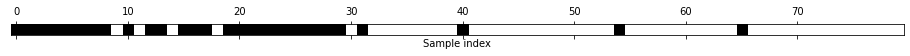

In [12]:
plt.matshow(mask_rfe.reshape(1,-1), cmap='gray_r')
plt.xlabel('Sample index')
plt.yticks([])
plt.show()

## SelectFromModel

In [18]:
mask_sfm = model_sfm.get_support()                          # mask of the features selected

n_selected_from_ori_sfm = sum(1 for i in mask_sfm[:n_feature_ori] if i == True)
acc_sfm = n_selected_from_ori_sfm  / n_feature_ori       # Find accuracy of selecting the original features
print(f'# Feature selected from Ori : {n_selected_from_ori_sfm}')
print(f'RFE accuracy : {acc_sfm:.0%}')

# Feature selected from Ori : 25
RFE accuracy : 83%


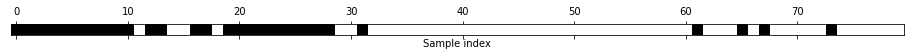

In [19]:
plt.matshow(mask_sfm.reshape(1,-1), cmap='gray_r')
plt.xlabel('Sample index')
plt.yticks([])
plt.show()

# accuracy and selection are similar to RFE. 
# SFM is more preferable in this case as non-recursive training is much faster  